In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random 

import seaborn as sns

import sys
sys.path.insert(0, '../../utils')
import utils as ut
import fancyplots as fp 
import realistic

import csv

from sklearn.metrics   import confusion_matrix, roc_curve
from sklearn.utils     import shuffle
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric

from matplotlib.ticker import PercentFormatter

In [2]:
# Input
K         = 25 
weights   = 'distance'  # 'distance' or 'uniform'
algorithm = 'ball_tree' # 'ball_tree', 'kd_tree', 'brute'
metric    = 'minkowski' # 'minkowski' (we should try also mahalanobis)
metric_p  = 2           # used if metric=='minkowski'
Ntrain    = 4500
dataset   = 'GSTLAL_2m' # 'NewRealistic' (->v0c1) or 'GSTLAL_2m'

In [3]:
data_root = '../../datasets/'

if dataset=='NewRealistic':
    path_X = 'NewRealistic/v0c1test_y.csv'
    path_Y = 'NewRealistic/v0c1test_tag.csv'
elif dataset=='GSTLAL_2m':
    path_X = 'GSTLAL_EarlyWarning_Dataset/Regression_Result/NN/NN_prediction.csv'
    path_Y = 'GSTLAL_EarlyWarning_Dataset/Dataset/test_label.csv'

X = ut.extractData(data_root+path_X)
Y = ut.extractData(data_root+path_Y)

X, Y = shuffle(X, Y)

Nsample = len(X)
if Ntrain>Nsample:
    print('Reduce Ntrain! Nsample=', Nsample, sep='')
    sys.exit()

xtrain = X[:Ntrain]
ytrain = Y[:Ntrain]
xtest  = X[Ntrain:]
ytest  = Y[Ntrain:]

K = 25: 0.81572


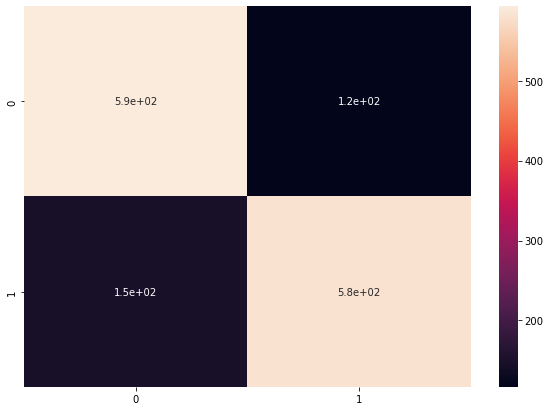

[[593 117]
 [148 580]]
------------------------------------------------


In [4]:
neigh = KNeighborsClassifier(n_neighbors = K,  
                             weights     = weights, 
                             algorithm   = algorithm,
                             metric      = metric,
                             p           = metric_p) 

neigh.fit(xtrain, ytrain)

print('K = {:d}: {:.5f}'.format(K,neigh.score(xtest,ytest)))

predict = neigh.predict(xtest)
proba   = neigh.predict_proba(xtest)

cm = confusion_matrix(ytest, predict)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.show()
print(cm)
print('------------------------------------------------')

In [5]:
for i in range(0,20):
    prediction = round(predict[i]);
    print("Predicted: {:d}, {:8.2f} % ([{:.2f}, {:.2f}])".format(\
          prediction, proba[i, prediction]*100, 
          proba[i, 0], proba[i, 1]))

Predicted: 0,   100.00 % ([1.00, 0.00])
Predicted: 1,   100.00 % ([0.00, 1.00])
Predicted: 0,   100.00 % ([1.00, 0.00])
Predicted: 1,    73.06 % ([0.27, 0.73])
Predicted: 0,    87.03 % ([0.87, 0.13])
Predicted: 1,   100.00 % ([0.00, 1.00])
Predicted: 1,   100.00 % ([0.00, 1.00])
Predicted: 1,   100.00 % ([0.00, 1.00])
Predicted: 1,    86.25 % ([0.14, 0.86])
Predicted: 1,   100.00 % ([0.00, 1.00])
Predicted: 0,   100.00 % ([1.00, 0.00])
Predicted: 0,    81.09 % ([0.81, 0.19])
Predicted: 0,    53.99 % ([0.54, 0.46])
Predicted: 1,   100.00 % ([0.00, 1.00])
Predicted: 0,    77.95 % ([0.78, 0.22])
Predicted: 0,   100.00 % ([1.00, 0.00])
Predicted: 0,   100.00 % ([1.00, 0.00])
Predicted: 1,   100.00 % ([0.00, 1.00])
Predicted: 1,    77.84 % ([0.22, 0.78])
Predicted: 0,    64.86 % ([0.65, 0.35])


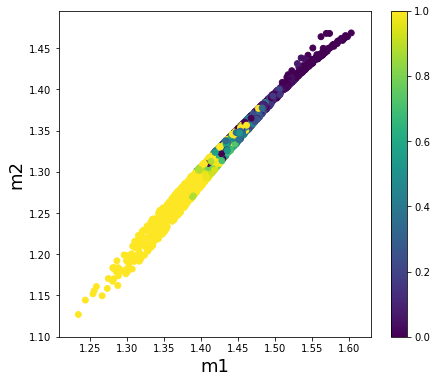

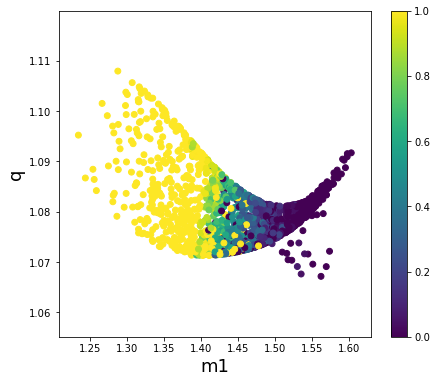

In [6]:
# scatter
m1     = xtest[:,0]
m2     = xtest[:,1]
prob1d = proba[:,1]

plt.figure(figsize=(7,6))
sc=plt.scatter(m1, m2, c=prob1d, vmin=0, vmax=1, s=35, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('m1', fontsize=18)
plt.ylabel('m2', fontsize=18)
plt.show()

plt.figure(figsize=(7,6))
q = m1/m2
plt.figure
sc=plt.scatter(m1, q, c=prob1d, vmin=0, vmax=1, s=35, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('m1', fontsize=18)
plt.ylabel('q',  fontsize=18)
plt.show()

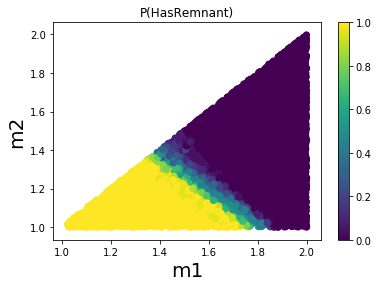

In [7]:
if dataset=='NewRealistic':
    fp.probLabelDensePlot(neigh, label_idx=2, \
                          dataset='NewRealistic', \
                          N=15000, mass_range=[1, 10], \
                          cv=1, title='P(NS & HasRemnant)')
elif dataset=='GSTLAL_2m':
    fp.probLabelDensePlot(neigh, label_idx=1, N=10000, \
                          mass_range=[1,2], \
                          dataset='GSTLAL_2m', \
                          title='P(HasRemnant)')

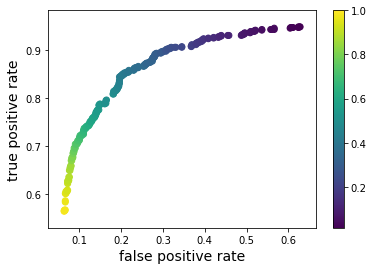

In [8]:
if dataset=="GSTLAL_2m":
    proba1D = neigh.predict_proba(xtest)[:,1]
    fp.plotROC(ytest, proba1D)
elif dataset=="NewRealistic":
    # vectorize me...
    proba1D_all = neigh.predict_proba(xtest)[:,2]
    ytest2D = []
    proba1D = []
    for i in range(0, len(ytest)):
        if ytest[i]==1:
            ytest2D.append(0)
            proba1D.append(proba1D_all[i])
        elif ytest[i]==2:
            ytest2D.append(1)
            proba1D.append(proba1D_all[i])
    fp.plotROC(ytest2D, proba1D)